In [1]:
import re
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.max_columns = 80
%matplotlib inline
warnings.filterwarnings("ignore")
sns.set_style("darkgrid")

In [2]:
df = pd.read_csv('./Desktop/Kaagle_Upload.csv', low_memory=False)[:152000]
# Giving the dimension information
print('Dataframe dimensions:', df.shape)

Dataframe dimensions: (152000, 70)


In [3]:
print('Dataframe dimensions:', df.shape)

Dataframe dimensions: (152000, 70)


In [4]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error

In [5]:
df=df.dropna() # The dataset is huge, therefore, dropping any rows with missing values is fine
df.head()
df.isnull().sum().sum()

0

In [6]:
df2 = df[['special_conditions_at_site','pedestrian_movement','road_surface_conditions','light_conditions','weather_conditions','age_of_vehicle','sex_of_driver','age_of_driver','junction_location', 'junction_detail','junction_control','did_police_officer_attend_scene_of_accident','accident_severity','day_of_week']]
df1 = df[['special_conditions_at_site','pedestrian_movement','age_of_vehicle','sex_of_driver','age_of_driver','junction_location','junction_detail','junction_control','did_police_officer_attend_scene_of_accident','day_of_week','accident_severity']]

In [7]:
df1.replace(-1, np.nan, inplace=True) # -1 should be imputed to NaN to be recognized as missing in the next row
df1=df1.dropna() # I drop all the rows with missing data once again
df1.shape

(42721, 11)

In [8]:
df2.replace(-1, np.nan, inplace=True) # Same as previously 
df2=df2.dropna()
df2.shape

(42653, 14)

In [9]:
pd.set_option('display.max_columns', 70) # Since we're dealing with moderately sized dataframe,
pd.set_option('display.max_rows', 13)

In [10]:
df2.replace(-1, np.nan, inplace=True) # Same as previously 
df2=df2.dropna()
df2.shape

(42653, 14)

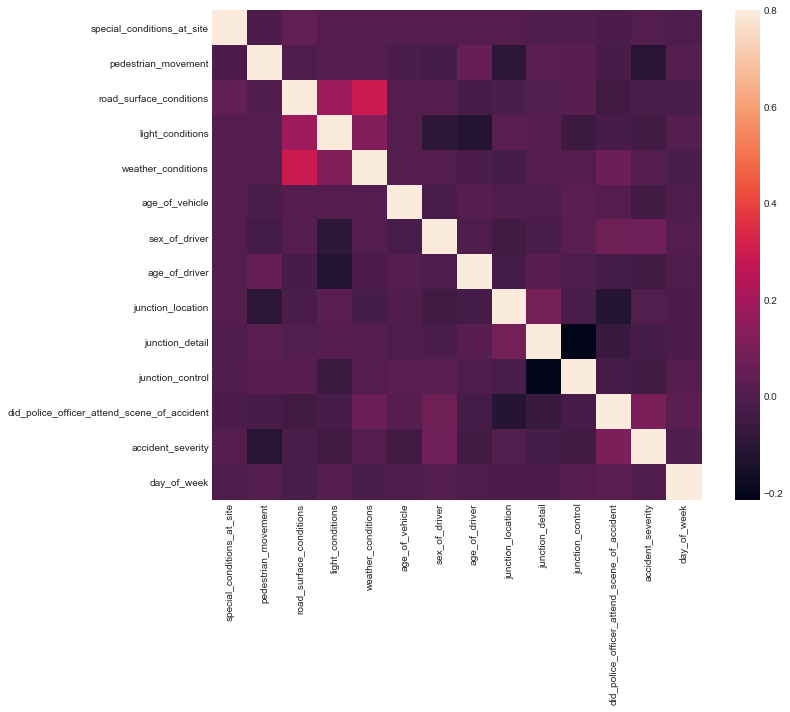

In [11]:
import matplotlib.pyplot as plt
corrmat = df2.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

#ax = sns.pairplot(df, size)
plt.show()

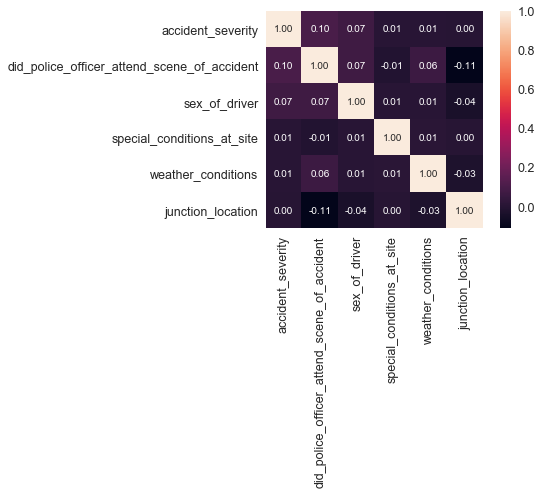

In [12]:
#cols = ['junction_detail','light_conditions','weather_conditions','casualty_type','day_of_week','junction_control','road_surface_conditions','casualty_severity']

k = 6 #number of variables for heatmap
cols = corrmat.nlargest(k, 'accident_severity')['accident_severity'].index
cm = np.corrcoef(df2[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [13]:
df2.head()

,special_conditions_at_site,pedestrian_movement,road_surface_conditions,light_conditions,weather_conditions,age_of_vehicle,sex_of_driver,age_of_driver,junction_location,junction_detail,junction_control,did_police_officer_attend_scene_of_accident,accident_severity,day_of_week
6,0.0,0.0,1.0,7,1,8.0,2.0,27.0,2.0,6.0,2.0,1.0,3,5
8,0.0,2.0,1.0,1,1,1.0,1.0,24.0,1.0,3.0,2.0,1.0,3,5
14,0.0,0.0,1.0,1,1,1.0,2.0,23.0,8.0,6.0,4.0,1.0,3,4
25,0.0,0.0,1.0,1,1,8.0,2.0,48.0,8.0,3.0,4.0,1.0,3,7
26,0.0,3.0,1.0,1,1,7.0,2.0,47.0,8.0,3.0,4.0,1.0,3,5


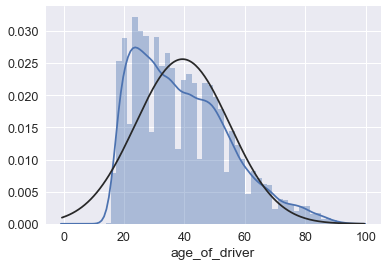

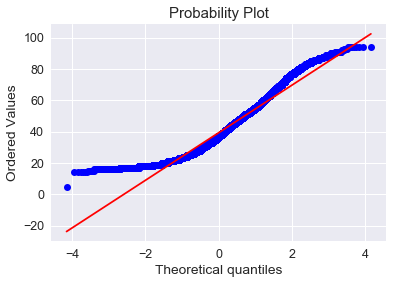

In [14]:
from scipy.stats import norm
from scipy import stats
#histogram and normal probability plot
sns.distplot(df1['age_of_driver'], fit=norm);
fig = plt.figure()
res = stats.probplot(df1['age_of_driver'], plot=plt)
plt.show()

In [15]:
df2['age_of_driver'] = np.log1p(df2['age_of_driver']) 
df2['age_of_vehicle'] = np.log1p(df2['age_of_vehicle'])# standardise the feature

df1['age_of_driver'] = np.log1p(df1['age_of_driver']) 
df1['age_of_vehicle'] = np.log1p(df1['age_of_vehicle'])#

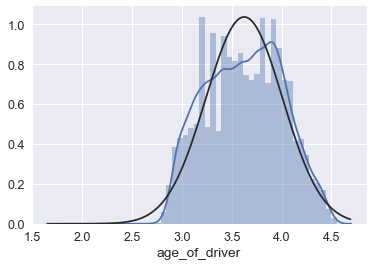

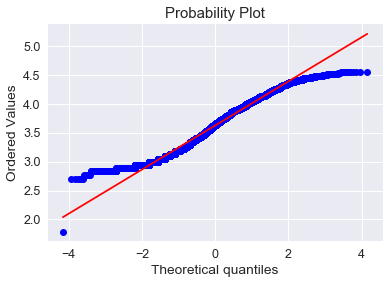

In [16]:
sns.distplot(df1['age_of_driver'], fit=norm);
fig = plt.figure()
res = stats.probplot(df1['age_of_driver'], plot=plt)
plt.show()

In [17]:
df2

,special_conditions_at_site,pedestrian_movement,road_surface_conditions,light_conditions,weather_conditions,age_of_vehicle,sex_of_driver,age_of_driver,junction_location,junction_detail,junction_control,did_police_officer_attend_scene_of_accident,accident_severity,day_of_week
6,0.0,0.0,1.0,7,1,2.197225,2.0,3.332205,2.0,6.0,2.0,1.0,3,5
8,0.0,2.0,1.0,1,1,0.693147,1.0,3.218876,1.0,3.0,2.0,1.0,3,5
14,0.0,0.0,1.0,1,1,0.693147,2.0,3.178054,8.0,6.0,4.0,1.0,3,4
25,0.0,0.0,1.0,1,1,2.197225,2.0,3.891820,8.0,3.0,4.0,1.0,3,7
26,0.0,3.0,1.0,1,1,2.079442,2.0,3.871201,8.0,3.0,4.0,1.0,3,5
28,0.0,0.0,1.0,1,1,2.079442,1.0,3.737670,8.0,6.0,4.0,1.0,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151945,0.0,0.0,1.0,1,1,0.693147,1.0,3.784190,1.0,5.0,4.0,1.0,3,3
151962,0.0,0.0,2.0,1,1,2.397895,1.0,3.465736,1.0,3.0,4.0,1.0,2,4
151973,0.0,0.0,1.0,1,1,2.708050,2.0,4.394449,8.0,6.0,2.0,1.0,3,5
